# Get all Pokemon base experiences for Sigmoid params


In [10]:
%pip install pokebase
%pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Get data


In [11]:
import pokebase as pb

pokemons = pb.APIResourceList('pokemon')

base_exps = []
for i, pokemon in enumerate(pokemons):
    poke = pb.APIResource("pokemon", pokemon["name"])
    base_exps.append(poke.base_experience)
    print(i +1, pokemon["name"], poke.base_experience)

1 bulbasaur 64
2 ivysaur 142
3 venusaur 236
4 charmander 62
5 charmeleon 142
6 charizard 240
7 squirtle 63
8 wartortle 142
9 blastoise 239
10 caterpie 39
11 metapod 72
12 butterfree 178
13 weedle 39
14 kakuna 72
15 beedrill 178
16 pidgey 50
17 pidgeotto 122
18 pidgeot 216
19 rattata 51
20 raticate 145
21 spearow 52
22 fearow 155
23 ekans 58
24 arbok 157
25 pikachu 112
26 raichu 218
27 sandshrew 60
28 sandslash 158
29 nidoran-f 55
30 nidorina 128
31 nidoqueen 227
32 nidoran-m 55
33 nidorino 128
34 nidoking 227
35 clefairy 113
36 clefable 217
37 vulpix 60
38 ninetales 177
39 jigglypuff 95
40 wigglytuff 196
41 zubat 49
42 golbat 159
43 oddish 64
44 gloom 138
45 vileplume 221
46 paras 57
47 parasect 142
48 venonat 61
49 venomoth 158
50 diglett 53
51 dugtrio 149
52 meowth 58
53 persian 154
54 psyduck 64
55 golduck 175
56 mankey 61
57 primeape 159
58 growlithe 70
59 arcanine 194
60 poliwag 60
61 poliwhirl 135
62 poliwrath 230
63 abra 62
64 kadabra 140
65 alakazam 225
66 machop 61
67 machoke 

## Visualize data


In [12]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_base_experience_distribution(base_experiences, title="Pokemon Base Experience Distribution"):
    """
    Create comprehensive visualization of base experience distribution.
    
    Args:
        base_experiences: List of base experience values
        title: Plot title
    """
    base_exp_array = np.array(base_experiences)
    
    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # 1. Histogram with density
    ax1.hist(base_exp_array, bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
    ax1.axvline(np.mean(base_exp_array), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(base_exp_array):.1f}')
    ax1.axvline(np.median(base_exp_array), color='orange', linestyle='--', linewidth=2, label=f'Median: {np.median(base_exp_array):.1f}')
    ax1.set_xlabel('Base Experience')
    ax1.set_ylabel('Density')
    ax1.set_title('Distribution Histogram')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Box plot with quartiles
    box_plot = ax2.boxplot(base_exp_array, vert=True, patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightgreen')
    ax2.set_ylabel('Base Experience')
    ax2.set_title('Box Plot (Quartiles & Outliers)')
    ax2.grid(True, alpha=0.3)
    
    # Add quartile annotations
    q1, q2, q3 = np.percentile(base_exp_array, [25, 50, 75])
    ax2.text(1.1, q1, f'Q1: {q1:.1f}', verticalalignment='center')
    ax2.text(1.1, q2, f'Q2: {q2:.1f}', verticalalignment='center')
    ax2.text(1.1, q3, f'Q3: {q3:.1f}', verticalalignment='center')
    
    # 3. Cumulative distribution
    sorted_values = np.sort(base_exp_array)
    percentiles = np.arange(1, len(sorted_values) + 1) / len(sorted_values) * 100
    ax3.plot(sorted_values, percentiles, linewidth=2, color='purple')
    ax3.set_xlabel('Base Experience')
    ax3.set_ylabel('Cumulative Percentage')
    ax3.set_title('Cumulative Distribution')
    ax3.grid(True, alpha=0.3)
    
    # Mark important percentiles
    for p in [10, 25, 50, 75, 90]:
        val = np.percentile(base_exp_array, p)
        ax3.axvline(val, color='gray', linestyle=':', alpha=0.7)
        ax3.text(val, p + 2, f'{p}%', rotation=90, fontsize=8)
    
    # 4. Summary statistics table
    ax4.axis('off')
    stats = [
        ['Count', f'{len(base_exp_array)}'],
        ['Mean', f'{np.mean(base_exp_array):.2f}'],
        ['Median', f'{np.median(base_exp_array):.2f}'],
        ['Std Dev', f'{np.std(base_exp_array):.2f}'],
        ['Min', f'{np.min(base_exp_array):.1f}'],
        ['Max', f'{np.max(base_exp_array):.1f}'],
        ['Range', f'{np.max(base_exp_array) - np.min(base_exp_array):.1f}'],
        ['Q1 (25%)', f'{np.percentile(base_exp_array, 25):.1f}'],
        ['Q3 (75%)', f'{np.percentile(base_exp_array, 75):.1f}'],
        ['IQR', f'{np.percentile(base_exp_array, 75) - np.percentile(base_exp_array, 25):.1f}']
    ]
    
    table = ax4.table(cellText=stats, colLabels=['Statistic', 'Value'], 
                     cellLoc='center', loc='center', colWidths=[0.4, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    ax4.set_title('Summary Statistics', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Print additional insights
    print("\n=== Distribution Analysis ===")
    print(f"Data points: {len(base_exp_array)}")
    print(f"Range: {np.min(base_exp_array):.1f} to {np.max(base_exp_array):.1f}")
    print(f"Mean ± Std: {np.mean(base_exp_array):.1f} ± {np.std(base_exp_array):.1f}")
    
    # Check for skewness
    from scipy import stats
    skewness = stats.skew(base_exp_array)
    print(f"Skewness: {skewness:.3f}", end="")
    if abs(skewness) < 0.5:
        print(" (approximately symmetric)")
    elif skewness > 0.5:
        print(" (right-skewed/positive skew)")
    else:
        print(" (left-skewed/negative skew)")
    
    print(f"\nPercentile breakdown:")
    for p in [10, 25, 50, 75, 90, 95, 99]:
        val = np.percentile(base_exp_array, p)
        print(f"  {p:2d}%: {val:6.1f}")

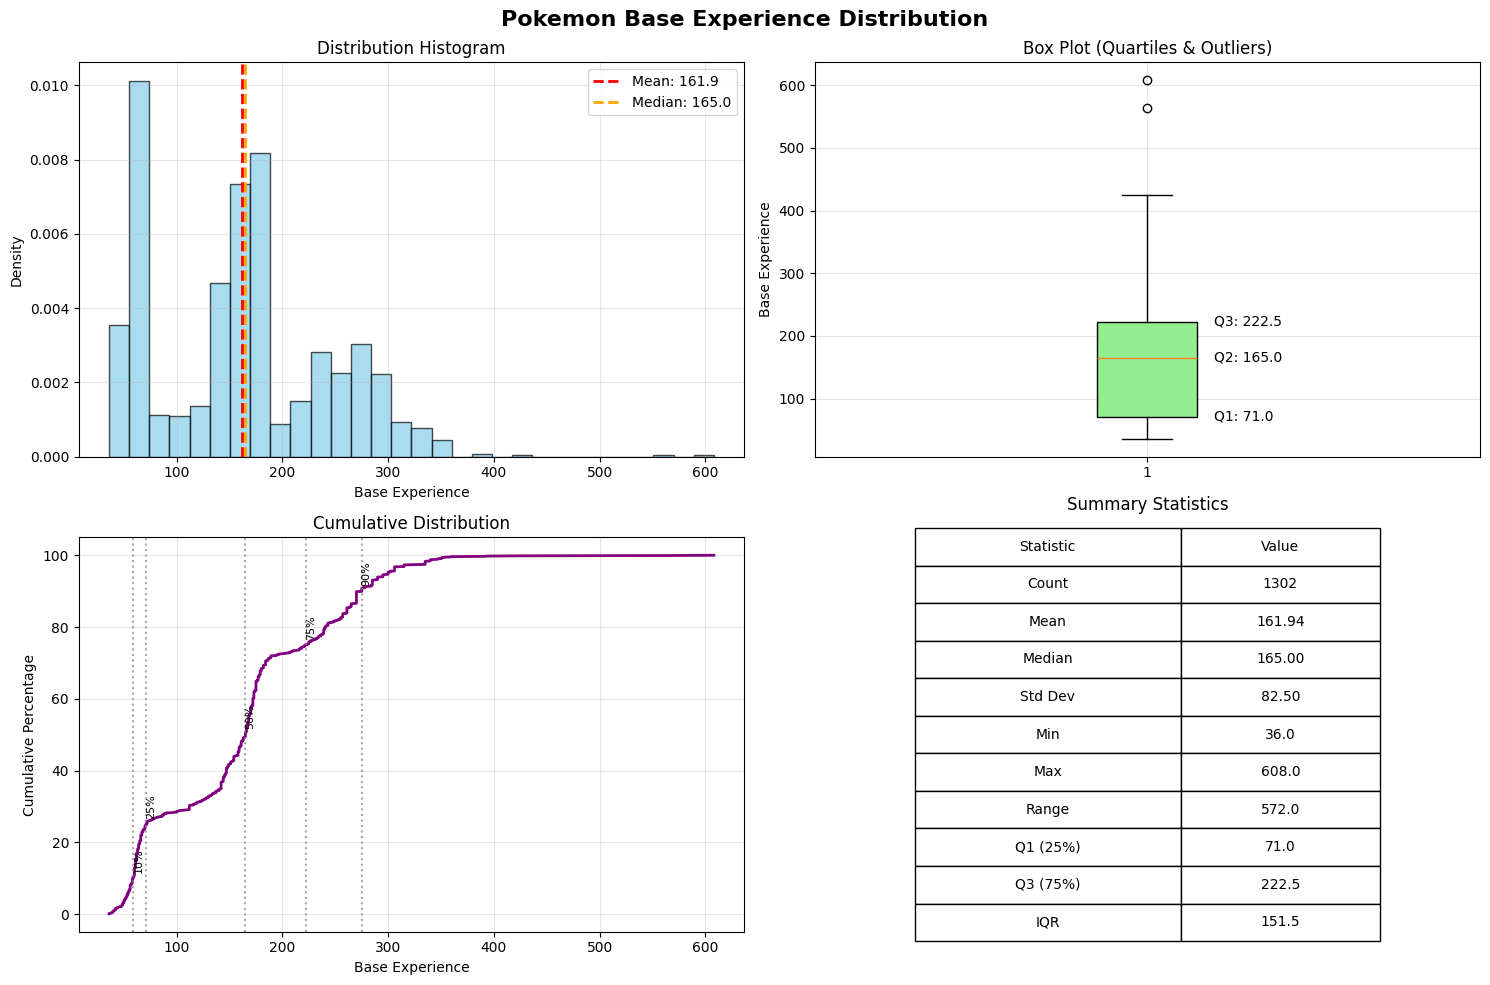


=== Distribution Analysis ===
Data points: 1302
Range: 36.0 to 608.0
Mean ± Std: 161.9 ± 82.5
Skewness: 0.483 (approximately symmetric)

Percentile breakdown:
  10%:   59.0
  25%:   71.0
  50%:  165.0
  75%:  222.5
  90%:  275.0
  95%:  300.0
  99%:  347.0


In [13]:
visualize_base_experience_distribution(base_exps)

## Get sigmoid params


In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt

def calculate_optimized_sigmoid_parameters(base_experiences, 
                                         target_easy_rate=0.85,    # 85% catch rate for "easy" Pokemon
                                         target_medium_rate=0.50,  # 50% catch rate for "medium" Pokemon  
                                         target_hard_rate=0.15,    # 15% catch rate for "hard" Pokemon
                                         easy_percentile=25,        # Bottom 25% are "easy"
                                         medium_percentile=60,      # 60th percentile is "medium"
                                         hard_percentile=85):       # 85th percentile is "hard"
    """
    Calculate sigmoid parameters optimized for skewed Pokemon data distribution.
    
    This approach:
    1. Uses percentiles instead of min/max to avoid outlier influence
    2. Positions the sigmoid curve based on desired difficulty progression
    3. Handles the right-skewed nature of Pokemon base experience data
    """
    
    base_exp_array = np.array(base_experiences)
    
    # Get reference points from percentiles (more robust than min/max)
    easy_threshold = np.percentile(base_exp_array, easy_percentile)
    medium_threshold = np.percentile(base_exp_array, medium_percentile) 
    hard_threshold = np.percentile(base_exp_array, hard_percentile)
    
    print(f"Percentile thresholds:")
    print(f"  Easy ({easy_percentile}%): {easy_threshold:.1f} (target rate: {target_easy_rate:.1%})")
    print(f"  Medium ({medium_percentile}%): {medium_threshold:.1f} (target rate: {target_medium_rate:.1%})")
    print(f"  Hard ({hard_percentile}%): {hard_threshold:.1f} (target rate: {target_hard_rate:.1%})")
    
    # Use medium threshold as midpoint for 50% catch rate
    midpoint = medium_threshold
    
    # Calculate steepness using the easy and hard reference points
    # sigmoid(x) = 1 / (1 + exp(steepness * (x - midpoint)))
    # Rearranged: steepness = ln((1-rate)/rate) / (x - midpoint)
    
    steepness_from_easy = math.log((1 - target_easy_rate) / target_easy_rate) / (easy_threshold - midpoint)
    steepness_from_hard = math.log((1 - target_hard_rate) / target_hard_rate) / (hard_threshold - midpoint)
    
    # Average the steepness calculations (they should be close if percentiles are well-chosen)
    steepness = (steepness_from_easy + steepness_from_hard) / 2
    
    # Handle outliers: cap extreme values to prevent unrealistic catch rates
    data_min = np.percentile(base_exp_array, 1)   # 1st percentile as effective minimum
    data_max = np.percentile(base_exp_array, 99)  # 99th percentile as effective maximum
    
    def sigmoid_with_caps(base_exp, steepness, midpoint, min_val=data_min, max_val=data_max):
        """Sigmoid with outlier protection"""
        # Cap extreme values
        capped_exp = np.clip(base_exp, min_val, max_val)
        
        try:
            return 1 / (1 + math.exp(steepness * (capped_exp - midpoint)))
        except OverflowError:
            return 0.0 if capped_exp > midpoint else 1.0
    
    # Validation across the full range
    test_percentiles = [1, 5, 10, 25, 50, 60, 75, 85, 90, 95, 99]
    validation_results = {}
    
    for p in test_percentiles:
        test_value = np.percentile(base_exp_array, p)
        catch_rate = sigmoid_with_caps(test_value, steepness, midpoint)
        validation_results[p] = {'base_exp': test_value, 'catch_rate': catch_rate}
    
    return {
        'midpoint': midpoint,
        'steepness': steepness,
        'data_min': data_min,
        'data_max': data_max,
        'thresholds': {
            'easy': easy_threshold,
            'medium': medium_threshold, 
            'hard': hard_threshold
        },
        'validation': validation_results,
        'sigmoid_function': lambda x: sigmoid_with_caps(x, steepness, midpoint)
    }

def visualize_sigmoid_curve(params, base_experiences):
    """Visualize the resulting sigmoid curve against the data distribution"""
    
    base_exp_array = np.array(base_experiences)
    
    # Create range for plotting sigmoid curve
    plot_range = np.linspace(np.min(base_exp_array), np.max(base_exp_array), 1000)
    catch_rates = [params['sigmoid_function'](x) for x in plot_range]
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Top plot: Distribution + Sigmoid curve
    ax1.hist(base_exp_array, bins=50, alpha=0.3, density=True, color='lightblue', 
             label='Pokemon Distribution')
    
    # Overlay sigmoid curve (scaled to fit histogram)
    ax1_twin = ax1.twinx()
    ax1_twin.plot(plot_range, catch_rates, 'red', linewidth=3, label='Catch Probability')
    ax1_twin.set_ylabel('Catch Probability', color='red')
    ax1_twin.set_ylim(0, 1)
    
    # Mark key thresholds
    for name, threshold in params['thresholds'].items():
        catch_rate = params['sigmoid_function'](threshold)
        ax1.axvline(threshold, linestyle='--', alpha=0.7, 
                   label=f'{name.title()}: {threshold:.0f} (rate: {catch_rate:.1%})')
        ax1_twin.scatter([threshold], [catch_rate], s=100, color='red', zorder=5)
    
    ax1.set_xlabel('Base Experience')
    ax1.set_ylabel('Pokemon Density')
    ax1.set_title('Pokemon Distribution vs Catch Probability Curve')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    # Bottom plot: Catch rates by percentile
    percentiles = list(params['validation'].keys())
    base_exps = [params['validation'][p]['base_exp'] for p in percentiles]
    catch_rates_val = [params['validation'][p]['catch_rate'] for p in percentiles]
    
    ax2.plot(base_exps, catch_rates_val, 'bo-', linewidth=2, markersize=8)
    ax2.set_xlabel('Base Experience (by percentile)')
    ax2.set_ylabel('Catch Probability')
    ax2.set_title('Catch Rates Across Pokemon Percentiles')
    ax2.grid(True, alpha=0.3)
    
    # Annotate percentiles
    for i, p in enumerate(percentiles[::2]):  # Every other percentile to avoid crowding
        ax2.annotate(f'{p}%', (base_exps[i*2], catch_rates_val[i*2]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print validation summary
    print("\n=== Sigmoid Validation Results ===")
    print("Percentile | Base Exp | Catch Rate")
    print("-" * 35)
    for p in percentiles:
        base_exp = params['validation'][p]['base_exp']
        rate = params['validation'][p]['catch_rate']
        print(f"    {p:2d}%    |   {base_exp:5.1f}  |   {rate:5.1%}")

# Runtime catching function
def catch_probability_optimized(base_exp, params):
    """Optimized catch probability function using calculated parameters"""
    return params['sigmoid_function'](base_exp)

In [18]:
params = calculate_optimized_sigmoid_parameters(base_exps)
params

Percentile thresholds:
  Easy (25%): 71.0 (target rate: 85.0%)
  Medium (60%): 172.0 (target rate: 50.0%)
  Hard (85%): 261.0 (target rate: 15.0%)


{'midpoint': np.float64(172.0),
 'steepness': np.float64(0.018332083686936264),
 'data_min': np.float64(42.0),
 'data_max': np.float64(347.0),
 'thresholds': {'easy': np.float64(71.0),
  'medium': np.float64(172.0),
  'hard': np.float64(261.0)},
 'validation': {1: {'base_exp': np.float64(42.0),
   'catch_rate': 0.9155349638724568},
  5: {'base_exp': np.float64(53.0), 'catch_rate': 0.8985774964826799},
  10: {'base_exp': np.float64(59.0), 'catch_rate': 0.8881046431402433},
  25: {'base_exp': np.float64(71.0), 'catch_rate': 0.8643078683122668},
  50: {'base_exp': np.float64(165.0), 'catch_rate': 0.5320371949404555},
  60: {'base_exp': np.float64(172.0), 'catch_rate': 0.5},
  75: {'base_exp': np.float64(222.5), 'catch_rate': 0.2837836312724058},
  85: {'base_exp': np.float64(261.0), 'catch_rate': 0.1636173918269743},
  90: {'base_exp': np.float64(275.0), 'catch_rate': 0.13144931310574556},
  95: {'base_exp': np.float64(300.0), 'catch_rate': 0.08734383840037674},
  99: {'base_exp': np.floa

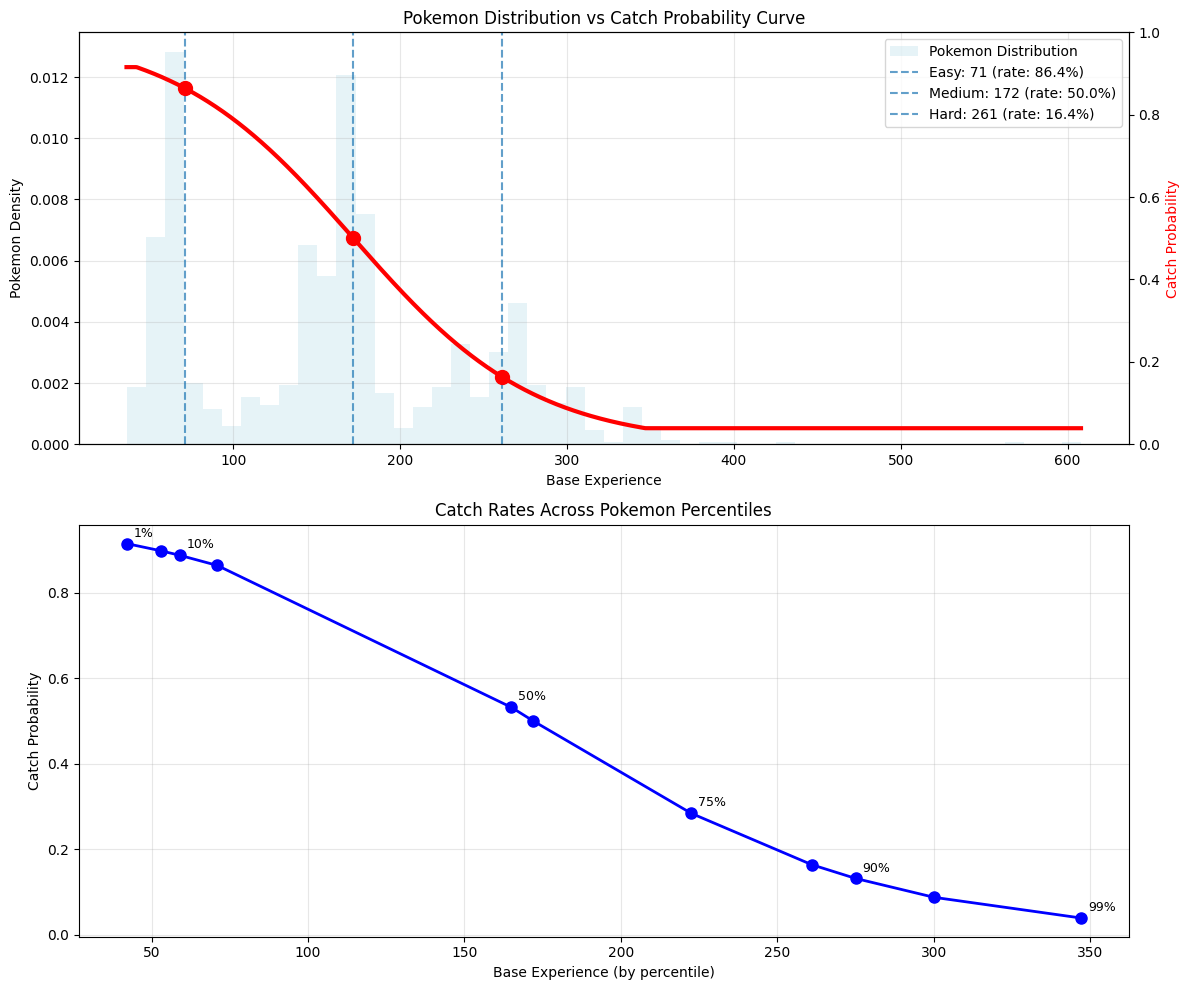


=== Sigmoid Validation Results ===
Percentile | Base Exp | Catch Rate
-----------------------------------
     1%    |    42.0  |   91.6%
     5%    |    53.0  |   89.9%
    10%    |    59.0  |   88.8%
    25%    |    71.0  |   86.4%
    50%    |   165.0  |   53.2%
    60%    |   172.0  |   50.0%
    75%    |   222.5  |   28.4%
    85%    |   261.0  |   16.4%
    90%    |   275.0  |   13.1%
    95%    |   300.0  |    8.7%
    99%    |   347.0  |    3.9%


In [19]:
visualize_sigmoid_curve(params, base_exps)

In [16]:
print(catch_probability_optimized(min(base_exps), params))
print(catch_probability_optimized(50, params))
print(catch_probability_optimized(100, params))
print(catch_probability_optimized(150, params))
print(catch_probability_optimized(200, params))
print(catch_probability_optimized(250, params))
print(catch_probability_optimized(300, params))
print(catch_probability_optimized(max(base_exps), params))

0.9155349638724568
0.9034809136237045
0.789166736713891
0.5994816641999177
0.3744206357454963
0.19311387201937652
0.08734383840037674
0.03886149367913194
